In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_score, recall_score, f1_score, RocCurveDisplay
)
import matplotlib.pyplot as plt

In [3]:
iris = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

In [4]:
rFc = RandomForestClassifier(n_estimators=100, random_state=42)
rFc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
y_pred = rFc.predict(X_test)

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("F1 Score:", f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.9707602339181286
Recall: 0.9636243386243386
Precision: 0.9736486486486486
F1 Score: 0.9682592716338122


In [7]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        63
           1       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [8]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 59   4]
 [  1 107]]


0.9968400940623163


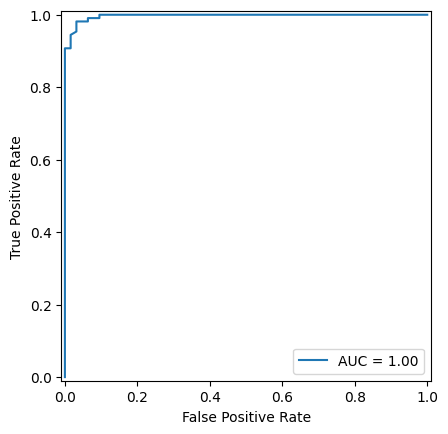

In [11]:
y_scores = rFc.predict_proba(X_test)[:, 1]  # probability for class 1

auc = roc_auc_score(y_test, y_scores)
print(auc)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc).plot()
plt.show()